# **Introduction:**<br>
Hurricanes are large, spiraling tropical storms that can pack wind speeds of over 160 mph and unleash more than 2.4 trillion gallons of rain a day.<br>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Satellite_Loop_of_Hurricane_Iota_11-16-2020.gif/220px-Satellite_Loop_of_Hurricane_Iota_11-16-2020.gif" alt="Snow" style="width:30%">

## **Facts about Hurricane**

*  Between 1980 and 2021, hurricanes have caused damage over 1.1 trillion dollar total, with an average cost of $ 20.5 billion per event.


*   They are responsible for the highest number of deaths among all natural disasters: 6,697 between 1980 and 2021.

*   The deadliest hurricane on record was a Category 4 storm that hit the island city of Galveston, Texas.





<img src="https://s.w-x.co/util/image/w/slow-hurricane-primary.jpg?v=at&w=1280&h=720" alt="Snow" style="width:30%">

**Only for illustration**

## **Objective**

*   After a hurricane, damage assessment is vital for relief workers and first responders so that resources and assistance can be appropriately planned and allocated.

*   **In this project,  we are trying to classify damaged and not damaged buildings using the satellite imagery data.**


### **References:**



1.   https://arxiv.org/abs/2111.14650
2.   https://arxiv.org/abs/1512.03385



![pink-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### **Flow of Project:**



This project is classified into 4 parts:


1.  Exploratory Data Analysis
2.  Modeling
> - Baseline ANN
> - CNN with Regularisation
> - SotA with Transfer Learning (ResNet50)
3.  Inferences
> - Saliency Maps
> - Model Comparison
4.  Conclusion and Future Work





#**Done By:**
*   Aayushi Tripathi




### **GROUND WORK**

# Installing and Importing the required Libraries

**Restart runtime after updating matplotlib**

In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 **Installing Libraries for plotting**

In [ ]:
!pip install mplsoccer -qq

     |████████████████████████████████| 63 kB 1.7 MB/s 


In [ ]:
!pip install --upgrade geopandas -qq
!pip install --upgrade pyshp -qq
!pip install --upgrade shapely -qq
!pip install --upgrade descartes -qq

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 76.3 MB/s 
     |████████████████████████████████| 16.7 MB 60.3 MB/s 
     |████████████████████████████████| 46 kB 2.3 MB/s 


In [ ]:
!pip install tf_keras_vis -qq
!pip install tensorflow-addons -qq

     |████████████████████████████████| 53 kB 1.4 MB/s 
     |████████████████████████████████| 1.1 MB 4.1 MB/s 


**Importing required libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.patheffects as path_effects
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore,BinaryScore

import cv2
import geopandas
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, roc_auc_score, roc_curve
from google.colab import drive
import mplsoccer

from IPython.display import clear_output
%matplotlib inline

# Loading the Data

Mounting the Google Drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Unzipping the dataset required to train and test the model 

In [ ]:
# extracting the zip folder

!unzip -qq /content/gdrive/MyDrive/Post-hurricane.zip

Unzipping the shape files required for plotting

In [ ]:
# extracting the zip folder containing the coordinates

!unzip -qq /content/gdrive/MyDrive/cb_2018_us_state_500k.zip

# Exploratory Data Analysis

Finding shape of the data 

In [ ]:
# DISPLAYING THE SHAPE OF IMAGE

image = mpl.image.imread('/content/train_another/damage/-93.55964_30.895018.jpeg')
imgArray = np.asarray(image)
length,width,layers = imgArray.shape

print('The Images are in the shape of '+str(length)+' x '+str(width)+' x '+str(layers))

The Images are in the shape of 128 x 128 x 3


Finding the Class Distribution for all the data splits

In [ ]:
# ======================================================================
# COUNTING THE IMAGES FOR RESPECTIVE LABELS / TARGET
# ======================================================================

numDamaged = {'Training Data':(os.listdir('/content/train_another/damage')).__len__(),
              'Validation Data':(os.listdir('/content/validation_another/damage')).__len__(),
              'Imbalanced\nTesting Data':(os.listdir('/content/test_another/damage')).__len__(),
              'Balanced\nTesting Data':(os.listdir('/content/test/damage')).__len__()}

numUndamaged = {'Training Data':(os.listdir('/content/train_another/no_damage')).__len__(),
                'Validation Data':(os.listdir('/content/validation_another/no_damage')).__len__(),
                'Imbalanced\nTesting Data':(os.listdir('/content/test_another/no_damage')).__len__(),
                'Balanced\nTesting Data':(os.listdir('/content/test/no_damage')).__len__()}

In [ ]:
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

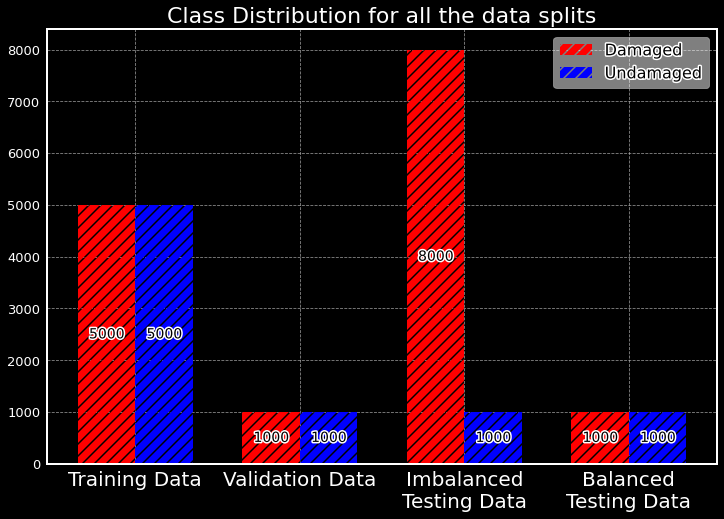

In [ ]:
# ======================================================================
# PLOTTING THE COUNTS OF RESPECTIVE LABELS IN DIFFERENT DATASETS
# ======================================================================


mpl.rc('axes',edgecolor='white')
mpl.rc('axes',linewidth='2')

fig, ax = plt.subplots(figsize=(12,8))
fig.set_facecolor('k')
ax.patch.set_facecolor('k')

ax.set_axisbelow(True)
ax.grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

mpl.rcParams['hatch.linewidth']=7

numSplits = np.arange(len(numDamaged.keys()))
width = 0.35 

rects1 = ax.bar(numSplits - width/2, list(numDamaged.values()), width, label='Damaged',color='None',edgecolor='red',lw=0,hatch='//',alpha=1)
rects2 = ax.bar(numSplits + width/2, list(numUndamaged.values()), width, label='Undamaged',color='None',edgecolor='blue',lw=0,hatch='//',alpha=1)

pe = path_effect_stroke(linewidth=3, foreground="w")

ax.bar_label(rects1,label_type='center',fontsize=14,color='k',path_effects=pe)
ax.bar_label(rects2,label_type='center',fontsize=14,color='k',path_effects=pe)

ax.set_xticks(numSplits)
ax.set_xticklabels(list(numDamaged.keys()),color='w',fontsize=20)

legend = ax.legend(fontsize=16,framealpha=0.5)

for text in legend.get_texts():
    text.set_color('k')
    text.set_path_effects(pe)

plt.yticks(color='w',fontsize=13)

plt.title('Class Distribution for all the data splits',
          fontsize=22,color='w')
plt.show()

Plotting an image from the Damaged and Undamaged classes of the training set

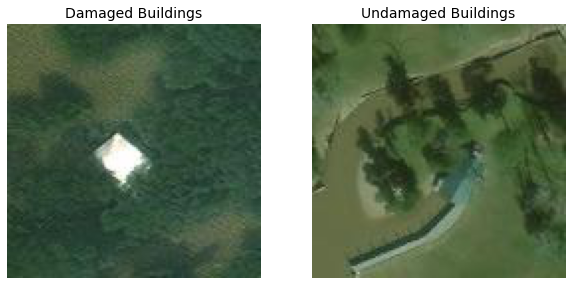

In [ ]:
# ======================================================================
# DISPLAYING THE IMAGES FROM A DATASET
# ======================================================================

fig,axs = plt.subplots(1,2,figsize=(10,5))

imgDamaged = mpl.image.imread('/content/train_another/damage/-93.55964_30.895018.jpeg')
axs[0].imshow(imgDamaged)
axs[0].axis('off')
axs[0].set_title('Damaged Buildings',fontsize=14)

imgUndamaged = mpl.image.imread('/content/train_another/no_damage/-95.061275_29.831535.jpeg')
axs[1].imshow(imgUndamaged)
axs[1].axis('off')
axs[1].set_title('Undamaged Buildings',fontsize=14)

plt.show()

Plotting the locations where the damaged buildings are present

In [ ]:
# ======================================================================
# HELPER FUNCTION
# return coordinates for plotting the map
# ======================================================================

def get_coords(path):
  longitudes = []
  latitudes = []
  filesPathList = []
  for file in os.listdir(path):
    name = os.path.splitext(file)[0]
    longitudes.append(name.split('_')[0])
    latitudes.append(name.split('_')[1])
  return longitudes,latitudes

In [ ]:
dfCoords = pd.DataFrame()
damagedLong, damagedLat = get_coords('/content/train_another/damage/')
undamagedLong, undamagedLat = get_coords('/content/train_another/no_damage/')
dfCoords['Damaged - Longitudes'] = damagedLong
dfCoords['Damaged - Latitudes'] = damagedLat
dfCoords['Undamaged - Longitudes'] = undamagedLong
dfCoords['Undamaged - Latitudes'] = undamagedLat

In [ ]:
dfCoords['Damaged - Longitudes'] = dfCoords['Damaged - Longitudes'].astype(float)
dfCoords['Damaged - Latitudes'] = dfCoords['Damaged - Latitudes'].astype(float)
dfCoords['Undamaged - Longitudes'] = dfCoords['Undamaged - Longitudes'].astype(float)
dfCoords['Undamaged - Latitudes'] = dfCoords['Undamaged - Latitudes'].astype(float)

In [ ]:
dfCoords.head()

,Damaged - Longitudes,Damaged - Latitudes,Undamaged - Longitudes,Undamaged - Latitudes
0,-95.656429,29.835231,-95.654318,29.836744
1,-93.793203,30.038712,-95.656429,29.835231
2,-95.510080,30.011791,-96.950952,28.542886
3,-95.634617,29.769827,-96.959859,28.783074
4,-95.641481,29.844400,-95.641481,29.844400


In [ ]:
usa = geopandas.read_file('/content/cb_2018_us_state_500k.shp')

In [ ]:
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


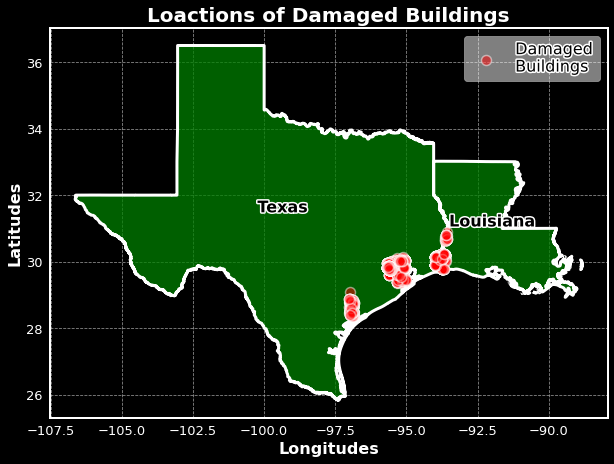

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('k')
ax.patch.set_facecolor('k')

ax.set_axisbelow(True)
ax.grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

mpl.rc('axes',edgecolor='white')
mpl.rc('axes',linewidth='2')

states = usa[(usa['NAME']=='Texas')|(usa['NAME']=='Louisiana')]

pe = path_effect_stroke(linewidth=3, foreground="w")

states.apply(lambda x: ax.annotate(text=x.NAME, xy=x.geometry.centroid.coords[0],
                                   ha='center', fontsize=16,color='k',fontweight='bold',path_effects=pe),
             axis=1)

states.plot(color="green",alpha=.75,ax=ax)
states.boundary.plot(color="white",linewidth=3,ax=ax)

# ax.scatter(x=dfCoords["Undamaged - Longitudes"], y=dfCoords["Undamaged - Latitudes"],s=100,alpha=.2,edgecolor='w',
#             c='blue',label='Undamaged',zorder=2)
ax.scatter(x=dfCoords["Damaged - Longitudes"], y=dfCoords["Damaged - Latitudes"],
           s=100,edgecolor='w',lw=1.5,c='red',label='Damaged\nBuildings',alpha=0.5,
           zorder=2)

legend = ax.legend(fontsize=16,framealpha=0.5)
for text in legend.get_texts():
    text.set_color('k')
    text.set_path_effects(pe)

plt.yticks(color='w',fontsize=13)
plt.xticks(color='w',fontsize=13)

plt.xlabel('Longitudes',fontsize=16,color='w',fontweight='bold')
plt.ylabel('Latitudes',fontsize=16,color='w',fontweight='bold')

plt.title('Loactions of Damaged Buildings',fontsize=20,color='w',fontweight='bold')

plt.show()

**Inference**<br>
We can observe that the hurricane hit in consideration, hit USA and the damaged buildings are located in and around the border of Texas and Louisiana.

# Modeling

In [ ]:
# Directories of all the data splits
train_directory = '/content/train_another'
val_directory = '/content/validation_another'
balanced_test_directory = '/content/test'
imbalanced_test_directory = '/content/test_another'

In [ ]:
def img_scaler(img, lab):
    return tf.math.divide(tf.cast(img, tf.float32), 255.), lab

In [ ]:
# Batch size to train and validate
BATCH_SIZE = 64 
# Size of the image 
IMAGE_SIZE = (128,128)

# Using flow_from_directory to get batches of transformed data
trainGen = keras.utils.image_dataset_from_directory(train_directory, 
                                                    batch_size=BATCH_SIZE,
                                                    label_mode = 'binary',
                                                    image_size=IMAGE_SIZE,)

valGen = keras.utils.image_dataset_from_directory(val_directory, 
                                                  batch_size=BATCH_SIZE,
                                                  label_mode = 'binary',
                                                  image_size=IMAGE_SIZE,)

balancedTestGen = keras.utils.image_dataset_from_directory(balanced_test_directory,
                                                           shuffle=False, 
                                                           batch_size=BATCH_SIZE,
                                                           label_mode = 'binary',
                                                           image_size=IMAGE_SIZE,)

imbalancedTestGen = keras.utils.image_dataset_from_directory(imbalanced_test_directory, 
                                                             shuffle=False, 
                                                             batch_size=BATCH_SIZE,
                                                             label_mode = 'binary',
                                                             image_size=IMAGE_SIZE,)

# Scaling the dataset and optimizing the tensorflow performance
trainGen.map(img_scaler).cache().prefetch(tf.data.AUTOTUNE)
valGen.map(img_scaler).cache().prefetch(tf.data.AUTOTUNE)
balancedTestGen.map(img_scaler).cache().prefetch(tf.data.AUTOTUNE)
imbalancedTestGen.map(img_scaler).cache().prefetch(tf.data.AUTOTUNE)

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
# Setting a random seed for reproducibility
np.random.seed(23)
tf.keras.utils.set_random_seed(23)  

## Baseline ANN

Creating a baseline Artificial Neural Network model

In [ ]:
ANN = keras.Sequential(
    [
     tf.keras.layers.Flatten(),
     
     tf.keras.layers.BatchNormalization(),

     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(512, activation='relu'),

     tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [ ]:
# compiling the model
# optimizer = adam
# loss = binary_crossentropy
# metrics = accuracy

ANN.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics='accuracy')

In [ ]:
# Fitting the data

historyANN = ANN.fit(trainGen,
                     epochs = 20,
                     validation_data = valGen)

Epoch 1/20
157/157 [==============================] - 8s 23ms/step - loss: 0.8684 - accuracy: 0.6780 - val_loss: 0.6597 - val_accuracy: 0.6545
Epoch 2/20
157/157 [==============================] - 3s 21ms/step - loss: 0.4981 - accuracy: 0.7688 - val_loss: 0.5250 - val_accuracy: 0.7465
Epoch 3/20
157/157 [==============================] - 3s 21ms/step - loss: 0.4443 - accuracy: 0.7985 - val_loss: 0.4419 - val_accuracy: 0.8075
Epoch 4/20
157/157 [==============================] - 3s 21ms/step - loss: 0.4071 - accuracy: 0.8151 - val_loss: 0.4672 - val_accuracy: 0.7810
Epoch 5/20
157/157 [==============================] - 3s 21ms/step - loss: 0.3710 - accuracy: 0.8386 - val_loss: 0.5091 - val_accuracy: 0.7800
Epoch 6/20
157/157 [==============================] - 3s 21ms/step - loss: 0.3352 - accuracy: 0.8530 - val_loss: 0.5039 - val_accuracy: 0.8025
Epoch 7/20
157/157 [==============================] - 3s 21ms/step - loss: 0.3070 - accuracy: 0.8684 - val_loss: 0.5165 - val_accuracy: 0.7785

Plotting the training and validation accuracies

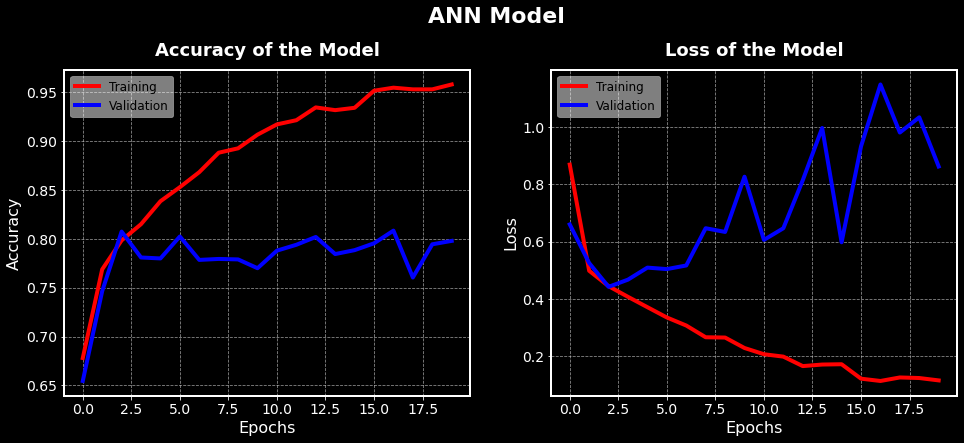

In [ ]:
# =============================================================================
# PLotting the history of ANN
# =============================================================================


fig,axs = plt.subplots(1,2,figsize=(16,6))

# Setting the background colors
fig.set_facecolor('k')
axs[0].patch.set_facecolor('k')
axs[1].patch.set_facecolor('k')

# Setting the grid for axes
axs[0].set_axisbelow(True)
axs[0].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)
axs[1].set_axisbelow(True)
axs[1].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

# Plotting the training and validation accuracies
axs[0].plot(historyANN.history['accuracy'],color='red',lw=4,label='Training')
axs[0].plot(historyANN.history['val_accuracy'],color='blue',lw=4,label='Validation')
# Labeling the x and y axes
axs[0].set_xlabel('Epochs',fontsize=16,color='white')
axs[0].set_ylabel('Accuracy',fontsize=16,color='white')
# Setting the fontsize and color for x and y ticklabels
axs[0].tick_params(axis='both', colors='w', labelsize=14)
# Setting the title
axs[0].set_title(y=1.025,label = 'Accuracy of the Model',color='w',fontsize=18,fontweight='bold')
# Plotting the legend
axs[0].legend(fontsize=12,framealpha=0.5)

# Plotting the training and validation losses
axs[1].plot(historyANN.history['loss'],color='red',lw=4,label='Training')
axs[1].plot(historyANN.history['val_loss'],color='blue',lw=4,label='Validation')
# Labeling the x and y axes
axs[1].set_xlabel('Epochs',fontsize=16,color='white')
axs[1].set_ylabel('Loss',fontsize=16,color='white')
# Setting the fontsize and color for x and y ticklabels
axs[1].tick_params(axis='both', colors='w', labelsize=14)
# Setting the title
axs[1].set_title(y=1.025,label = 'Loss of the Model',color='w',fontsize=18,fontweight='bold')
# Plotting the legend
axs[1].legend(fontsize=12,framealpha=0.5)

fig.suptitle(y=1.025,t='ANN Model',color='w',fontsize=22,fontweight='bold')

plt.show()

In [ ]:
# Calculating the Loss and Accuracies on Balanced and Imbalanced datasets

balancedLossANN, balancedAccuracyANN = ANN.evaluate(balancedTestGen,verbose=0)
imbalancedLossANN, imbalancedAccuracyANN = ANN.evaluate(imbalancedTestGen,verbose=0)

In [ ]:
# Reporting the Loss and Accuracies on Balanced and Imbalanced datasets

print('Accuracy of the baseline Model on the balanced Test dataset  : {:.2f}%'.format(balancedAccuracyANN*100))
print('Loss of the baseline Model on the balanced Test dataset  : {:.4f}'.format(balancedLossANN))
print('\nAccuracy of the baseline Model on the imbalanced Test dataset  : {:.2f}%'.format(imbalancedAccuracyANN*100))
print('Loss of the baseline Model on the imbalanced Test dataset  : {:.4f}'.format(imbalancedLossANN))

Accuracy of the baseline Model on the balanced Test dataset  : 89.40%
Loss of the baseline Model on the balanced Test dataset  : 0.3961

Accuracy of the baseline Model on the imbalanced Test dataset  : 82.41%
Loss of the baseline Model on the imbalanced Test dataset  : 0.5987


In [ ]:
# =============================================================================
# Predicting the outputs of balanced and imbalanced dataset
# =============================================================================

predBalancedANN = ANN.predict(balancedTestGen,verbose=0)
predImbalancedANN = ANN.predict(imbalancedTestGen,verbose=0)

In [ ]:
# converting the predictions from probability to binary
# predictions for balanced dataset

balancedTestLabelsANN = [int(y.numpy()[0]) for _,y in balancedTestGen.unbatch()]
balancedTestPredsANN =  np.array([predBalancedANN>=0.5]).astype(int).flatten()

In [ ]:
# converting the predictions from probability to binary
# predictions for imbalanced dataset

imbalancedTestLabelsANN = [int(y.numpy()[0]) for _,y in imbalancedTestGen.unbatch()]
imbalancedTestPredsANN =  np.array([predImbalancedANN>=0.5]).astype(int).flatten()

In [ ]:
# computing the roc score for predicitons of balanced and imbalanced dataset

balRocAucANN = roc_auc_score(balancedTestLabelsANN, predBalancedANN)
imbalRocAucANN = roc_auc_score(imbalancedTestLabelsANN, predImbalancedANN)

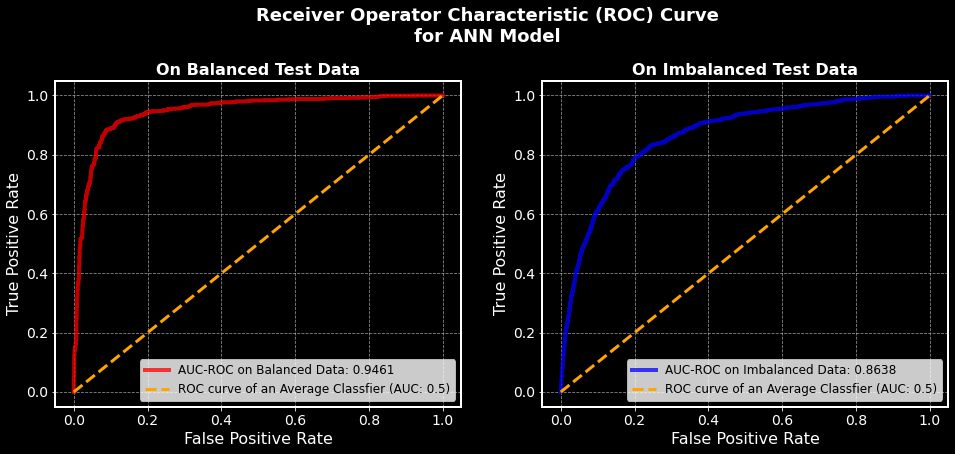

In [ ]:
# =============================================================================
# PLotting the Roc auc curve 
# predicitons for balanced and imbalanced dataset
# =============================================================================

fig,axs = plt.subplots(1,2,figsize=(16,6))
fig.set_facecolor('k')

axs[0].patch.set_facecolor('k')
axs[1].patch.set_facecolor('k')

axs[0].set_axisbelow(True)
axs[0].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

axs[1].set_axisbelow(True)
axs[1].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

ns_fpr = [0,1]
ns_tpr = [0,1]

fpr_balanced,tpr_balanced, threshold_balanced = roc_curve(balancedTestLabelsANN, predBalancedANN)
fpr_imbalanced,tpr_imbalanced, threshold_imbalanced = roc_curve(imbalancedTestLabelsANN, predImbalancedANN)

axs[0].plot(fpr_balanced, tpr_balanced, lw=4, color='red', alpha=0.75,
            label='AUC-ROC on Balanced Data: {:.4f}'.format(balRocAucANN))
axs[0].plot(ns_fpr, ns_tpr, linestyle='--',color='orange',lw=3,label='ROC curve of an Average Classfier (AUC: 0.5)')

axs[0].tick_params(axis='both', colors='w', labelsize=14)
axs[0].set_xlabel('False Positive Rate',fontsize=16,color='white')
axs[0].set_ylabel('True Positive Rate',fontsize=16,color='white')
axs[0].legend(fontsize=12)
axs[0].set_title('On Balanced Test Data',c='w',fontsize=16,fontweight='bold') 

axs[1].plot(fpr_imbalanced, tpr_imbalanced, lw=4, color='blue', alpha=0.75,
            label='AUC-ROC on Imbalanced Data: {:.4f}'.format(imbalRocAucANN))
axs[1].plot(ns_fpr, ns_tpr, linestyle='--',color='orange',lw=3,label='ROC curve of an Average Classfier (AUC: 0.5)')

axs[1].tick_params(axis='both', colors='w', labelsize=14)
axs[1].set_xlabel('False Positive Rate',fontsize=16,color='white')
axs[1].set_ylabel('True Positive Rate',fontsize=16,color='white')
axs[1].legend(fontsize=12)
axs[1].set_title('On Imbalanced Test Data',c='w',fontsize=16,fontweight='bold')

fig.suptitle(y=1.05,t='Receiver Operator Characteristic (ROC) Curve\nfor ANN Model',c='w',fontsize=18,fontweight='bold')

plt.show()

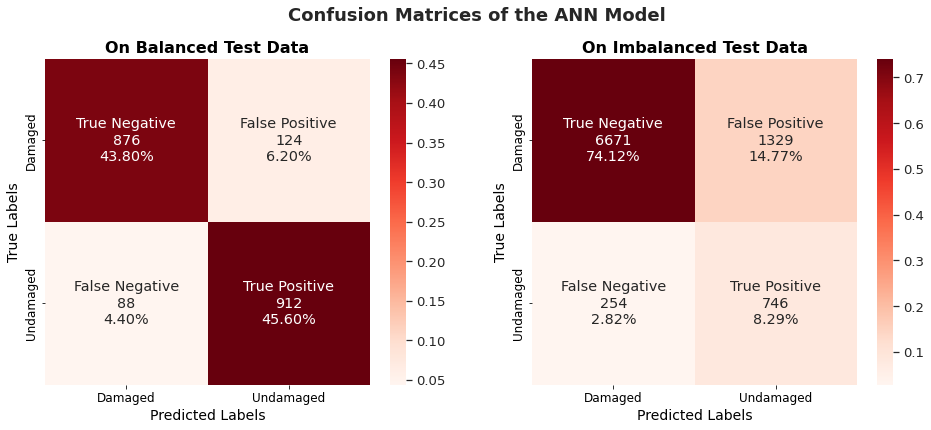

In [ ]:
# =============================================================================
# PLotting confusion matrix ANN model
# Predictions on balanced and imbalanced dataset
# =============================================================================


# Plotting Confusion Matrix
fig,axs = plt.subplots(1,2,figsize=(16,6))

conf_matrix_bal_ANN = confusion_matrix(balancedTestLabelsANN, balancedTestPredsANN)
names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{}'.format(value) for value in conf_matrix_bal_ANN.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_bal_ANN.flatten()/np.sum(conf_matrix_bal_ANN)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_bal_ANN/np.sum(conf_matrix_bal_ANN),fmt='',cmap='Reds',ax=axs[0],annot=labels)
axs[0].set_xticklabels(['Damaged','Undamaged'])
axs[0].set_yticklabels(['Damaged','Undamaged'])
axs[0].tick_params(axis='both', which='major', labelsize=12) 
axs[0].set_xlabel('Predicted Labels',fontsize=14)
axs[0].set_ylabel('True Labels',fontsize=14)
axs[0].set_title('On Balanced Test Data',fontsize=16,fontweight='bold') 

conf_matrix_imb_ANN = confusion_matrix(imbalancedTestLabelsANN, imbalancedTestPredsANN)
names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{}'.format(value) for value in conf_matrix_imb_ANN.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_imb_ANN.flatten()/np.sum(conf_matrix_imb_ANN)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_imb_ANN/np.sum(conf_matrix_imb_ANN),fmt='',cmap='Reds',ax=axs[1],annot=labels)
axs[1].set_xticklabels(['Damaged','Undamaged'])
axs[1].set_yticklabels(['Damaged','Undamaged'])
axs[1].tick_params(axis='both', which='major', labelsize=12) 
axs[1].set_xlabel('Predicted Labels',fontsize=14)
axs[1].set_ylabel('True Labels',fontsize=14)
axs[1].set_title('On Imbalanced Test Data',fontsize=16,fontweight='bold') 

fig.suptitle(y=1,t='Confusion Matrices of the ANN Model',fontsize=18,fontweight='bold')

plt.show()

In [ ]:
# =============================================================================
# Computing the precision score, recall score, False Positive Rate and 
# False Negative Rate
# BALANCED DATASET
# =============================================================================

precision_bal_ANN = conf_matrix_bal_ANN[1][1]/(conf_matrix_bal_ANN[1][1]+conf_matrix_bal_ANN[0][1])
recall_bal_ANN = conf_matrix_bal_ANN[1][1]/(conf_matrix_bal_ANN[1][1]+conf_matrix_bal_ANN[1][0])
fpr_bal_ANN = conf_matrix_bal_ANN[0][1]/(conf_matrix_bal_ANN[0][0]+conf_matrix_bal_ANN[0][1])
fnr_bal_ANN = conf_matrix_bal_ANN[1][0]/(conf_matrix_bal_ANN[1][1]+conf_matrix_bal_ANN[1][0])

In [ ]:
# Displaying the performance measurements calculated

print('Precision of the ANN Model on the Balanced Testing Data: {:.4f}'.format(precision_bal_ANN))
print('Recall of the ANN Model on the Balanced Testing Data: {:.4f}'.format(recall_bal_ANN))
print('False Positive Rate of the ANN Model on the Balanced Testing Data: {:.4f}%'.format(round(fpr_bal_ANN,4)*100))
print('False Negative Rate of the ANN Model on the Balanced Testing Data: {:.4f}%'.format(round(fnr_bal_ANN,4)*100))

Precision of the ANN Model on the Balanced Testing Data: 0.8803
Recall of the ANN Model on the Balanced Testing Data: 0.9120
False Positive Rate of the ANN Model on the Balanced Testing Data: 12.4000%
False Negative Rate of the ANN Model on the Balanced Testing Data: 8.8000%


In [ ]:
# =============================================================================
# Computing the precision score, recall score, False Positive Rate and 
# False Negative Rate
# IMBALANCED DATASET
# =============================================================================

precision_imb_ANN = conf_matrix_imb_ANN[1][1]/(conf_matrix_imb_ANN[1][1]+conf_matrix_imb_ANN[0][1])
recall_imb_ANN = conf_matrix_imb_ANN[1][1]/(conf_matrix_imb_ANN[1][1]+conf_matrix_imb_ANN[1][0])
fpr_imb_ANN = conf_matrix_imb_ANN[0][1]/(conf_matrix_imb_ANN[0][0]+conf_matrix_imb_ANN[0][1])
fnr_imb_ANN = conf_matrix_imb_ANN[1][0]/(conf_matrix_imb_ANN[1][1]+conf_matrix_imb_ANN[1][0])

In [ ]:
# Displaying the performance measurements calculated

print('Precision of the ANN Model on the Imbalanced Testing Data: {:.4f}'.format(precision_imb_ANN))
print('Recall of the ANN Model on the Imbalanced Testing Data: {:.4f}'.format(recall_imb_ANN))
print('False Positive Rate of the ANN Model on the Imbalanced Testing Data: {:.4f}%'.format(round(fpr_imb_ANN,4)*100))
print('False Negative Rate of the ANN Model on the Imbalanced Testing Data: {:.4f}%'.format(round(fnr_imb_ANN,4)*100))

Precision of the ANN Model on the Imbalanced Testing Data: 0.3595
Recall of the ANN Model on the Imbalanced Testing Data: 0.7460
False Positive Rate of the ANN Model on the Imbalanced Testing Data: 16.6100%
False Negative Rate of the ANN Model on the Imbalanced Testing Data: 25.4000%


## CNN with Regularization 

In [ ]:
# ====================================================================================
# Building a Convolutional Neural Network
# No regularization
# Using Batch Normalization
# ====================================================================================


CNNReg = Sequential(name='CNN_with_Regularization')

CNNReg.add(tf.keras.layers.Input(shape=(128,128,3)))

CNNReg.add(tf.keras.layers.BatchNormalization(momentum=0.7))

CNNReg.add(tf.keras.layers.Conv2D(16,kernel_size=3,strides=(1, 1),activation='relu'))
CNNReg.add(tf.keras.layers.Conv2D(16,kernel_size=3,strides=(1, 1),activation='relu'))
CNNReg.add(tf.keras.layers.MaxPooling2D())

CNNReg.add(tf.keras.layers.Conv2D(64,kernel_size=3,strides=(1, 1),activation='relu'))
CNNReg.add(tf.keras.layers.Conv2D(64,kernel_size=3,strides=(1, 1),activation='relu'))
CNNReg.add(tf.keras.layers.MaxPooling2D())

CNNReg.add(tf.keras.layers.Conv2D(128,kernel_size=3,strides=(1, 1),activation='relu'))
CNNReg.add(tf.keras.layers.Conv2D(128,kernel_size=3,strides=(1, 1),activation='relu'))
CNNReg.add(tf.keras.layers.MaxPooling2D())

CNNReg.add(tf.keras.layers.Flatten())

CNNReg.add(tf.keras.layers.Dense(128,activation='relu'))
CNNReg.add(tf.keras.layers.BatchNormalization(momentum=0.7))
CNNReg.add(tf.keras.layers.Dropout(0.20))

CNNReg.add(tf.keras.layers.Dense(128,activation='relu'))
CNNReg.add(tf.keras.layers.BatchNormalization(momentum=0.7))

CNNReg.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
# Compiling the model

CNNReg.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

# Early stopping callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=0,restore_best_weights=True)

In [ ]:
CNNReg.summary()

Model: "CNN_with_Regularization"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        9280      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58,

In [ ]:
# Fitting the data on the model CNN
 
historyCNN = CNNReg.fit(trainGen,epochs = 20,
                        validation_data = valGen,
                        callbacks=[earlyStopping])

Epoch 1/20
157/157 [==============================] - 22s 70ms/step - loss: 0.2686 - accuracy: 0.8931 - val_loss: 0.1753 - val_accuracy: 0.9295
Epoch 2/20
157/157 [==============================] - 10s 66ms/step - loss: 0.1411 - accuracy: 0.9442 - val_loss: 0.3907 - val_accuracy: 0.8545
Epoch 3/20
157/157 [==============================] - 11s 67ms/step - loss: 0.1105 - accuracy: 0.9570 - val_loss: 0.0830 - val_accuracy: 0.9730
Epoch 4/20
157/157 [==============================] - 10s 66ms/step - loss: 0.0874 - accuracy: 0.9673 - val_loss: 0.1071 - val_accuracy: 0.9565
Epoch 5/20
157/157 [==============================] - 11s 66ms/step - loss: 0.0708 - accuracy: 0.9744 - val_loss: 0.0968 - val_accuracy: 0.9665
Epoch 6/20
157/157 [==============================] - 11s 67ms/step - loss: 0.0655 - accuracy: 0.9749 - val_loss: 0.2549 - val_accuracy: 0.9240
Epoch 7/20
157/157 [==============================] - 11s 67ms/step - loss: 0.0637 - accuracy: 0.9777 - val_loss: 0.0636 - val_accuracy:

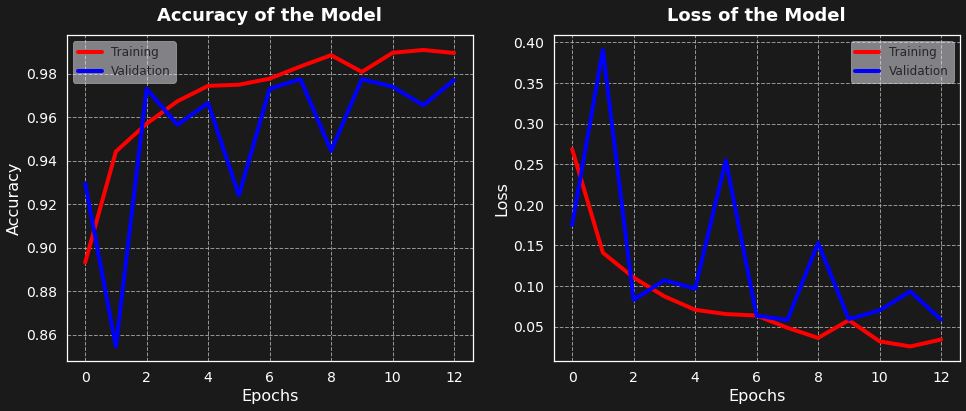

In [ ]:
# =============================================================================
# PLotting the history of CNN model
# =============================================================================

fig,axs = plt.subplots(1,2,figsize=(16,6))

# Setting the background colors
fig.set_facecolor('k')
axs[0].patch.set_facecolor('k')
axs[1].patch.set_facecolor('k')

# Setting the grid for axes
axs[0].set_axisbelow(True)
axs[0].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)
axs[1].set_axisbelow(True)
axs[1].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

# Plotting the training and validation accuracies
axs[0].plot(historyCNN.history['accuracy'],color='red',lw=4,label='Training')
axs[0].plot(historyCNN.history['val_accuracy'],color='blue',lw=4,label='Validation')
# Labeling the x and y axes 
axs[0].set_xlabel('Epochs',fontsize=16,color='white')
axs[0].set_ylabel('Accuracy',fontsize=16,color='white')
# Setting the fontsize and color for x and y ticklabels
axs[0].tick_params(axis='both', colors='w', labelsize=14)
# Setting the title
axs[0].set_title(y=1.025,label = 'Accuracy of the Model',color='w',fontsize=18,fontweight='bold')
# Plotting the legend
axs[0].legend(fontsize=12,framealpha=0.5)

# Plotting the training and validation losses
axs[1].plot(historyCNN.history['loss'],color='red',lw=4,label='Training')
axs[1].plot(historyCNN.history['val_loss'],color='blue',lw=4,label='Validation')
# Labeling the x and y axes
axs[1].set_xlabel('Epochs',fontsize=16,color='white')
axs[1].set_ylabel('Loss',fontsize=16,color='white')
# Setting the fontsize and color for x and y ticklabels
axs[1].tick_params(axis='both', colors='w', labelsize=14)
# Setting the title
axs[1].set_title(y=1.025,label = 'Loss of the Model',color='w',fontsize=18,fontweight='bold')
# Plotting the legend
axs[1].legend(fontsize=12,framealpha=0.5)

plt.show()

In [ ]:
# Computing the Loss and Accuracies on Balanced and Imbalanced datasets

balancedLossCNN, balancedAccuracyCNN = CNNReg.evaluate(balancedTestGen,verbose=0)
imbalancedLossCNN, imbalancedAccuracyCNN = CNNReg.evaluate(imbalancedTestGen,verbose=0)

In [ ]:
# Reporting the Loss and Accuracies on Balanced and Imbalanced datasets

print('Accuracy of the regualrized CNN Model on the balanced Test dataset : {:.2f}%'.format(balancedAccuracyCNN*100))
print('Loss of the regualrized CNN Model on the balanced Test dataset : {:.4f}'.format(balancedLossCNN))
print('\nAccuracy of the regualrized CNN Model on the imbalanced Test dataset : {:.2f}%'.format(imbalancedAccuracyCNN*100))
print('Loss of the regualrized CNN Model on the imbalanced Test dataset : {:.4f}'.format(imbalancedLossCNN))

Accuracy of the regualrized CNN Model on the balanced Test dataset : 98.10%
Loss of the regualrized CNN Model on the balanced Test dataset : 0.0523

Accuracy of the regualrized CNN Model on the imbalanced Test dataset : 97.93%
Loss of the regualrized CNN Model on the imbalanced Test dataset : 0.0603


In [ ]:
# =============================================================================
# Making predictions on the balanced and imbalanced dataset
# =============================================================================

predBalancedCNN = CNNReg.predict(balancedTestGen,verbose=0)
predImbalancedCNN = CNNReg.predict(imbalancedTestGen,verbose=0)

In [ ]:
# Converting the predicitons from probability to binary
# BALANCED DATASET

balancedTestLabelsCNN = [int(y.numpy()[0]) for _,y in balancedTestGen.unbatch()]
balancedTestPredsCNN =  np.array([predBalancedCNN>=0.5]).astype(int).flatten()

In [ ]:
# Converting the predicitons from probability to binary
# IMBALANCED DATASET

imbalancedTestLabelsCNN = [int(y.numpy()[0]) for _,y in imbalancedTestGen.unbatch()]
imbalancedTestPredsCNN =  np.array([predImbalancedCNN>=0.5]).astype(int).flatten()

In [ ]:
# =============================================================================
# Computing the roc auc score of balanced and imbalanced dataset = CNN
# =============================================================================

balRocAucCNN = roc_auc_score(balancedTestLabelsCNN, predBalancedCNN)
imbalRocAucCNN = roc_auc_score(imbalancedTestLabelsCNN, predImbalancedCNN)

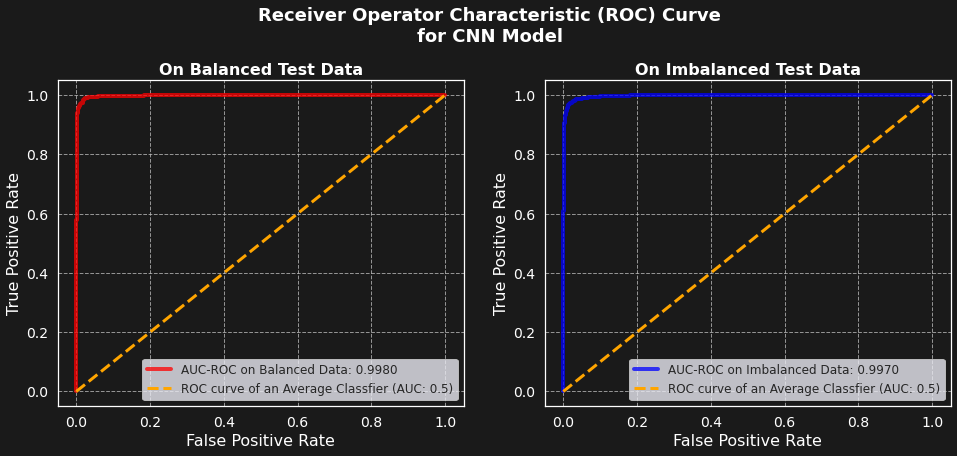

In [ ]:
# ================================================================================
# Plotting the ROC AUC curve of predictions on balanced and imbalanced datasets
# ================================================================================

fig,axs = plt.subplots(1,2,figsize=(16,6))
fig.set_facecolor('k')

axs[0].patch.set_facecolor('k')
axs[1].patch.set_facecolor('k')

axs[0].set_axisbelow(True)
axs[0].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

axs[1].set_axisbelow(True)
axs[1].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

ns_fpr = [0,1]
ns_tpr = [0,1]

fpr_balanced,tpr_balanced, threshold_balanced = roc_curve(balancedTestLabelsCNN, predBalancedCNN)
fpr_imbalanced,tpr_imbalanced, threshold_imbalanced = roc_curve(imbalancedTestLabelsCNN, predImbalancedCNN)

axs[0].plot(fpr_balanced, tpr_balanced, lw=4, color='red', alpha=0.75,
            label='AUC-ROC on Balanced Data: {:.4f}'.format(balRocAucCNN))
axs[0].plot(ns_fpr, ns_tpr, linestyle='--',color='orange',lw=3,label='ROC curve of an Average Classfier (AUC: 0.5)')

axs[0].tick_params(axis='both', colors='w', labelsize=14)
axs[0].set_xlabel('False Positive Rate',fontsize=16,color='white')
axs[0].set_ylabel('True Positive Rate',fontsize=16,color='white')
axs[0].legend(fontsize=12)
axs[0].set_title('On Balanced Test Data',c='w',fontsize=16,fontweight='bold') 

axs[1].plot(fpr_imbalanced, tpr_imbalanced, lw=4, color='blue', alpha=0.75,
            label='AUC-ROC on Imbalanced Data: {:.4f}'.format(imbalRocAucCNN))
axs[1].plot(ns_fpr, ns_tpr, linestyle='--',color='orange',lw=3,label='ROC curve of an Average Classfier (AUC: 0.5)')

axs[1].tick_params(axis='both', colors='w', labelsize=14)
axs[1].set_xlabel('False Positive Rate',fontsize=16,color='white')
axs[1].set_ylabel('True Positive Rate',fontsize=16,color='white')
axs[1].legend(fontsize=12)
axs[1].set_title('On Imbalanced Test Data',c='w',fontsize=16,fontweight='bold') 

fig.suptitle(y=1.05,t='Receiver Operator Characteristic (ROC) Curve\nfor CNN Model',c='w',fontsize=18,fontweight='bold')

plt.show()

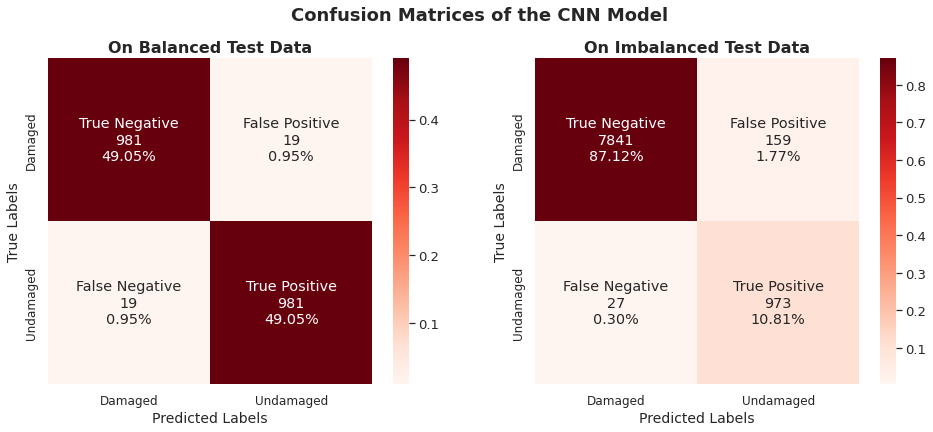

In [ ]:
# =============================================================================
# CNN
# Plotting Confusion Matrix for predictions on balanced and imbalanced dataset
# =============================================================================


fig,axs = plt.subplots(1,2,figsize=(16,6))

conf_matrix_bal_CNN = confusion_matrix(balancedTestLabelsCNN, balancedTestPredsCNN)
names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{}'.format(value) for value in conf_matrix_bal_CNN.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_bal_CNN.flatten()/np.sum(conf_matrix_bal_CNN)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_bal_CNN/np.sum(conf_matrix_bal_CNN),fmt='',cmap='Reds',ax=axs[0],annot=labels)
axs[0].set_xticklabels(['Damaged','Undamaged'])
axs[0].set_yticklabels(['Damaged','Undamaged'])
axs[0].tick_params(axis='both', which='major', labelsize=12) 
axs[0].set_xlabel('Predicted Labels',fontsize=14)
axs[0].set_ylabel('True Labels',fontsize=14)
axs[0].set_title('On Balanced Test Data',fontsize=16,fontweight='bold') 

conf_matrix_imb_CNN = confusion_matrix(imbalancedTestLabelsCNN, imbalancedTestPredsCNN)
names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{}'.format(value) for value in conf_matrix_imb_CNN.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_imb_CNN.flatten()/np.sum(conf_matrix_imb_CNN)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_imb_CNN/np.sum(conf_matrix_imb_CNN),fmt='',cmap='Reds',ax=axs[1],annot=labels)
axs[1].set_xticklabels(['Damaged','Undamaged'])
axs[1].set_yticklabels(['Damaged','Undamaged'])
axs[1].tick_params(axis='both', which='major', labelsize=12) 
axs[1].set_xlabel('Predicted Labels',fontsize=14)
axs[1].set_ylabel('True Labels',fontsize=14)
axs[1].set_title('On Imbalanced Test Data',fontsize=16,fontweight='bold') 

fig.suptitle(y=1,t='Confusion Matrices of the CNN Model',fontsize=18,fontweight='bold')

plt.show()

In [ ]:
# =============================================================================
# CNN
# Computing the precision score, recall score, False Positive Rate and 
# False Negative Rate
# BALANCED DATASET
# =============================================================================

precision_bal_CNN = conf_matrix_bal_CNN[1][1]/(conf_matrix_bal_CNN[1][1]+conf_matrix_bal_CNN[0][1])
recall_bal_CNN = conf_matrix_bal_CNN[1][1]/(conf_matrix_bal_CNN[1][1]+conf_matrix_bal_CNN[1][0])
fpr_bal_CNN = conf_matrix_bal_CNN[0][1]/(conf_matrix_bal_CNN[0][0]+conf_matrix_bal_CNN[0][1])
fnr_bal_CNN = conf_matrix_bal_CNN[1][0]/(conf_matrix_bal_CNN[1][1]+conf_matrix_bal_CNN[1][0])

In [ ]:
# DISPLAYING THE SCORES COMPUTED

print('Precision of the CNN Model on the Balanced Testing Data: {:.4f}'.format(precision_bal_CNN))
print('Recall of the CNN Model on the Balanced Testing Data: {:.4f}'.format(recall_bal_CNN))
print('False Positive Rate of the CNN Model on the Balanced Testing Data: {:.4f}%'.format(round(fpr_bal_CNN,4)*100))
print('False Negative Rate of the CNN Model on the Balanced Testing Data: {:.4f}%'.format(round(fnr_bal_CNN,4)*100))

Precision of the CNN Model on the Balanced Testing Data: 0.9810
Recall of the CNN Model on the Balanced Testing Data: 0.9810
False Positive Rate of the CNN Model on the Balanced Testing Data: 1.9000%
False Negative Rate of the CNN Model on the Balanced Testing Data: 1.9000%


In [ ]:
# =============================================================================
# Computing the precision score, recall score, False Positive Rate and 
# False Negative Rate
# IMBALANCED DATASET
# =============================================================================

precision_imb_CNN = conf_matrix_imb_CNN[1][1]/(conf_matrix_imb_CNN[1][1]+conf_matrix_imb_CNN[0][1])
recall_imb_CNN = conf_matrix_imb_CNN[1][1]/(conf_matrix_imb_CNN[1][1]+conf_matrix_imb_CNN[1][0])
fpr_imb_CNN = conf_matrix_imb_CNN[0][1]/(conf_matrix_imb_CNN[0][0]+conf_matrix_imb_CNN[0][1])
fnr_imb_CNN = conf_matrix_imb_CNN[1][0]/(conf_matrix_imb_CNN[1][1]+conf_matrix_imb_CNN[1][0])

In [ ]:
# DISPLAYING THE SCORES COMPUTED

print('Precision of the CNN Model on the Imbalanced Testing Data: {:.4f}'.format(precision_imb_CNN))
print('Recall of the CNN Model on the Imbalanced Testing Data: {:.4f}'.format(recall_imb_CNN))
print('False Positive Rate of the CNN Model on the Imbalanced Testing Data: {:.4f}%'.format(round(fpr_imb_CNN,4)*100))
print('False Negative Rate of the CNN Model on the Imbalanced Testing Data: {:.4f}%'.format(round(fnr_imb_CNN,4)*100))

Precision of the CNN Model on the Imbalanced Testing Data: 0.8595
Recall of the CNN Model on the Imbalanced Testing Data: 0.9730
False Positive Rate of the CNN Model on the Imbalanced Testing Data: 1.9900%
False Negative Rate of the CNN Model on the Imbalanced Testing Data: 2.7000%


## SotA Model - ResNet50

In [ ]:
# =============================================================================
# USING RESNET50 FROM TENSORFLOW
# 
# Using ImageDataGenerator to generate data for model training
# =============================================================================

BATCH_SIZE = 64
datagenTrain = ImageDataGenerator(preprocessing_function=preprocess_input)
datagenValTest = ImageDataGenerator(preprocessing_function=preprocess_input)

trainGenResNet = datagenTrain.flow_from_directory(directory = train_directory,
                                             batch_size=BATCH_SIZE,
                                             class_mode = 'binary',
                                             target_size=(224,224),
                                             color_mode='rgb')

valGenResNet = datagenValTest.flow_from_directory(directory = val_directory,
                                                  batch_size=BATCH_SIZE,
                                                  class_mode = 'binary',
                                                  target_size=(224,224),
                                                  color_mode='rgb')

balTestGenResNet = datagenValTest.flow_from_directory(directory = balanced_test_directory,
                                                      batch_size=BATCH_SIZE,
                                                      shuffle=False,
                                                      class_mode = 'binary',
                                                      target_size=(224,224),
                                                      color_mode='rgb')

imbalTestGenResNet = datagenValTest.flow_from_directory(directory = imbalanced_test_directory,
                                                        batch_size=BATCH_SIZE,
                                                        shuffle=False,
                                                        class_mode = 'binary',
                                                        target_size=(224,224),
                                                        color_mode='rgb')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 9000 images belonging to 2 classes.


In [ ]:
# =============================================================================
# Instantiating the RESNET model object
# =============================================================================

resnet = ResNet50(weights='imagenet', 
                  include_top=False, 
                  input_shape=(224,224,3))

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# =============================================================================
# Making the extra layers for the ending
# =============================================================================

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
# The final model object created

resnetModel = Model(inputs=resnet.input, outputs= output)

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
resnetModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# =============================================================================
# Resnet
# Compiling the model
# =============================================================================

resnetModel.compile(loss='binary_crossentropy',
                    optimizer='adam',
                    metrics='accuracy')

# early stopping callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,verbose=0,restore_best_weights=True)

In [ ]:
# =============================================================================
# RESNET
# fitting the data into model
# =============================================================================

historyResNet = resnetModel.fit(trainGenResNet,
                                epochs=20,
                                validation_data = valGenResNet,
                                steps_per_epoch = trainGenResNet.n//trainGenResNet.batch_size,
                                validation_steps = valGenResNet.n//valGenResNet.batch_size,
                                callbacks=[earlyStopping])

Epoch 1/20
156/156 [==============================] - 43s 250ms/step - loss: 0.1679 - accuracy: 0.9304 - val_loss: 0.1113 - val_accuracy: 0.9567
Epoch 2/20
156/156 [==============================] - 38s 240ms/step - loss: 0.0853 - accuracy: 0.9654 - val_loss: 0.1254 - val_accuracy: 0.9486
Epoch 3/20
156/156 [==============================] - 38s 242ms/step - loss: 0.0651 - accuracy: 0.9746 - val_loss: 0.0719 - val_accuracy: 0.9713
Epoch 4/20
156/156 [==============================] - 38s 242ms/step - loss: 0.0456 - accuracy: 0.9837 - val_loss: 0.0722 - val_accuracy: 0.9743
Epoch 5/20
156/156 [==============================] - 38s 242ms/step - loss: 0.0318 - accuracy: 0.9887 - val_loss: 0.1153 - val_accuracy: 0.9556
Epoch 6/20
156/156 [==============================] - 38s 242ms/step - loss: 0.0233 - accuracy: 0.9913 - val_loss: 0.0750 - val_accuracy: 0.9743
Epoch 7/20
156/156 [==============================] - 38s 243ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0647 - val_ac

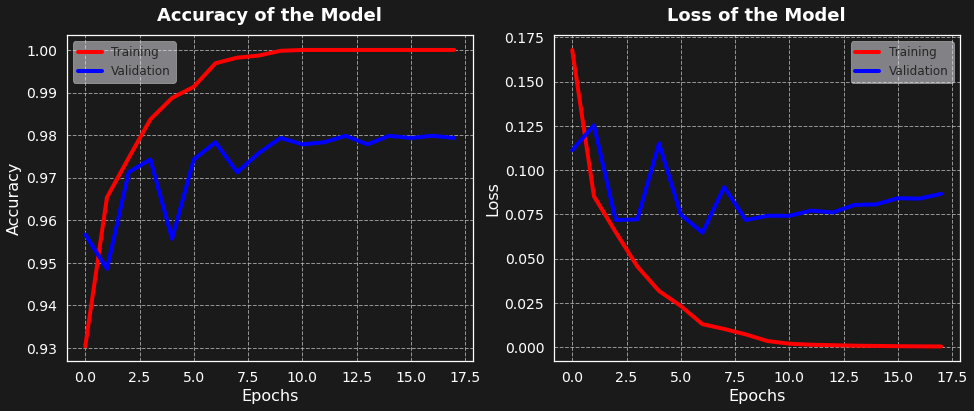

In [ ]:
# =============================================================================
# RESNET
# Plotting the history
# =============================================================================

fig,axs = plt.subplots(1,2,figsize=(16,6))

# Setting the background colors
fig.set_facecolor('k')
axs[0].patch.set_facecolor('k')
axs[1].patch.set_facecolor('k')

# Setting the grid for axes
axs[0].set_axisbelow(True)
axs[0].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)
axs[1].set_axisbelow(True)
axs[1].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

# Plotting the training and validation accuracies
axs[0].plot(historyResNet.history['accuracy'],color='red',lw=4,label='Training')
axs[0].plot(historyResNet.history['val_accuracy'],color='blue',lw=4,label='Validation')
# Labeling the x and y axes
axs[0].set_xlabel('Epochs',fontsize=16,color='white')
axs[0].set_ylabel('Accuracy',fontsize=16,color='white')
# Setting the fontsize and color for x and y ticklabels
axs[0].tick_params(axis='both', colors='w', labelsize=14)
# Setting the title
axs[0].set_title(y=1.025,label = 'Accuracy of the Model',color='w',fontsize=18,fontweight='bold')
# Plotting the legend
axs[0].legend(fontsize=12,framealpha=0.5)

# Plotting the training and validation losses
axs[1].plot(historyResNet.history['loss'],color='red',lw=4,label='Training')
axs[1].plot(historyResNet.history['val_loss'],color='blue',lw=4,label='Validation')
# Labeling the x and y axes
axs[1].set_xlabel('Epochs',fontsize=16,color='white')
axs[1].set_ylabel('Loss',fontsize=16,color='white')
# Setting the fontsize and color for x and y ticklabels
axs[1].tick_params(axis='both', colors='w', labelsize=14)
# Setting the title
axs[1].set_title(y=1.025,label = 'Loss of the Model',color='w',fontsize=18,fontweight='bold')
# Plotting the legend
axs[1].legend(fontsize=12,framealpha=0.5)

plt.show()

In [ ]:
# Calculating the Loss and Accuracies on Balanced and Imbalanced datasets

balancedLossResNet, balancedAccuracyResNet = resnetModel.evaluate(balTestGenResNet,verbose=0)
imbalancedLossResNet, imbalancedAccuracyResNet = resnetModel.evaluate(imbalTestGenResNet,verbose=0)

In [ ]:
# Reporting the Loss and Accuracies on Balanced and Imbalanced datasets

print('Accuracy of the ResNet Model on the balanced Test dataset  : {:.2f}%'.format(balancedAccuracyResNet*100))
print('Loss of the ResNet Model on the balanced Test dataset  : {:.4f}'.format(balancedLossResNet))
print('\nAccuracy of the ResNet Model on the imbalanced Test dataset  : {:.2f}%'.format(imbalancedAccuracyResNet*100))
print('Loss of the ResNet Model on the imbalanced Test dataset  : {:.4f}'.format(imbalancedLossResNet))

Accuracy of the ResNet Model on the balanced Test dataset  : 98.95%
Loss of the ResNet Model on the balanced Test dataset  : 0.0353

Accuracy of the ResNet Model on the imbalanced Test dataset  : 98.23%
Loss of the ResNet Model on the imbalanced Test dataset  : 0.0606


In [ ]:
# =============================================================================
# RESNET
# making predictions on balanced and imbalanced dataset
# =============================================================================

predBalancedResNet = resnetModel.predict(balTestGenResNet,verbose=0)
predImbalancedResNet = resnetModel.predict(imbalTestGenResNet,verbose=0)

In [ ]:
balTestLabelsResNet = []
for i in range((balTestGenResNet.n//balTestGenResNet.batch_size)+1):
  _,y = balTestGenResNet.next()
  balTestLabelsResNet.extend(y)

In [ ]:
imbalTestLabelsResNet = []
for i in range((imbalTestGenResNet.n//imbalTestGenResNet.batch_size)+1):
  _,y = imbalTestGenResNet.next()
  imbalTestLabelsResNet.extend(y)

In [ ]:
# =============================================================================
# RESNET
# Converting the predicitons from probability to binary labels
# =============================================================================

balTestPredsResNet =  np.array([predBalancedResNet>=0.5]).astype(int).flatten()
imbalTestPredsResNet =  np.array([predImbalancedResNet>=0.5]).astype(int).flatten()

In [ ]:
# =============================================================================
# RESNET
# computing the roc auc score
# =============================================================================

balRocAucResNet = roc_auc_score(balTestLabelsResNet, predBalancedResNet)
imbalRocAucResNet = roc_auc_score(imbalTestLabelsResNet, predImbalancedResNet)

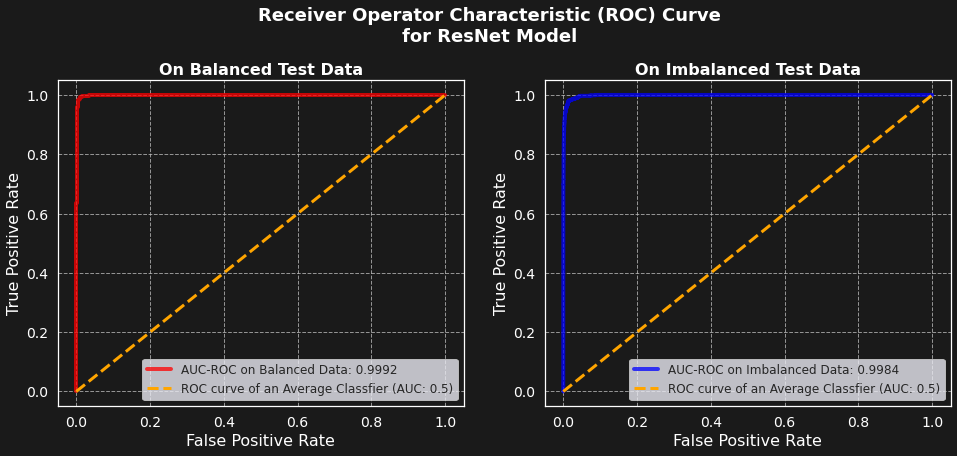

In [ ]:
# =============================================================================
# RESNET
# Plotting the ROC AUC curve
# =============================================================================


fig,axs = plt.subplots(1,2,figsize=(16,6))
fig.set_facecolor('k')

axs[0].patch.set_facecolor('k')
axs[1].patch.set_facecolor('k')

axs[0].set_axisbelow(True)
axs[0].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

axs[1].set_axisbelow(True)
axs[1].grid(color='#bdbdbd',which='major',linestyle='--',alpha=0.75)

ns_fpr = [0,1]
ns_tpr = [0,1]

fpr_balanced,tpr_balanced, threshold_balanced = roc_curve(balTestLabelsResNet, predBalancedResNet)
fpr_imbalanced,tpr_imbalanced, threshold_imbalanced = roc_curve(imbalTestLabelsResNet, predImbalancedResNet)

axs[0].plot(fpr_balanced, tpr_balanced, lw=4, color='red', alpha=0.75,
            label='AUC-ROC on Balanced Data: {:.4f}'.format(balRocAucResNet))
axs[0].plot(ns_fpr, ns_tpr, linestyle='--',color='orange',lw=3,label='ROC curve of an Average Classfier (AUC: 0.5)')

axs[0].tick_params(axis='both', colors='w', labelsize=14)
axs[0].set_xlabel('False Positive Rate',fontsize=16,color='white')
axs[0].set_ylabel('True Positive Rate',fontsize=16,color='white')
axs[0].legend(fontsize=12)
axs[0].set_title('On Balanced Test Data',c='w',fontsize=16,fontweight='bold') 

axs[1].plot(fpr_imbalanced, tpr_imbalanced, lw=4, color='blue', alpha=0.75,
            label='AUC-ROC on Imbalanced Data: {:.4f}'.format(imbalRocAucResNet))
axs[1].plot(ns_fpr, ns_tpr, linestyle='--',color='orange',lw=3,label='ROC curve of an Average Classfier (AUC: 0.5)')

axs[1].tick_params(axis='both', colors='w', labelsize=14)
axs[1].set_xlabel('False Positive Rate',fontsize=16,color='white')
axs[1].set_ylabel('True Positive Rate',fontsize=16,color='white')
axs[1].legend(fontsize=12)
axs[1].set_title('On Imbalanced Test Data',c='w',fontsize=16,fontweight='bold') 

fig.suptitle(y=1.05,t='Receiver Operator Characteristic (ROC) Curve\nfor ResNet Model',c='w',fontsize=18,fontweight='bold')

plt.show()


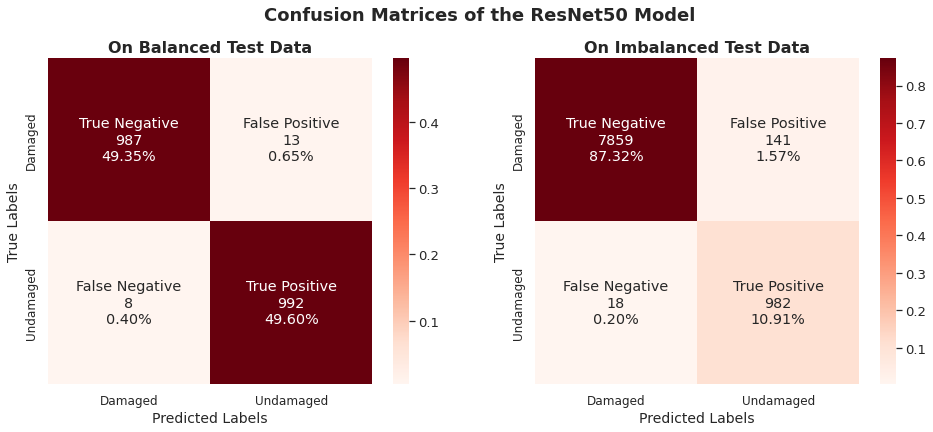

In [ ]:
# =============================================================================
# RESNET
# Plotting Confusion Matrix
# =============================================================================


fig,axs = plt.subplots(1,2,figsize=(16,6))

conf_matrix_bal_ResNet = confusion_matrix(balTestLabelsResNet, balTestPredsResNet)
names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{}'.format(value) for value in conf_matrix_bal_ResNet.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_bal_ResNet.flatten()/np.sum(conf_matrix_bal_ResNet)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_bal_ResNet/np.sum(conf_matrix_bal_ResNet),fmt='',cmap='Reds',ax=axs[0],annot=labels)
axs[0].set_xticklabels(['Damaged','Undamaged'])
axs[0].set_yticklabels(['Damaged','Undamaged'])
axs[0].tick_params(axis='both', which='major', labelsize=12) 
axs[0].set_xlabel('Predicted Labels',fontsize=14)
axs[0].set_ylabel('True Labels',fontsize=14)
axs[0].set_title('On Balanced Test Data',fontsize=16,fontweight='bold') 

conf_matrix_imb_ResNet = confusion_matrix(imbalTestLabelsResNet, imbalTestPredsResNet)
names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{}'.format(value) for value in conf_matrix_imb_ResNet.flatten()]
percentages = ['{0:.2%}'.format(value) for value in conf_matrix_imb_ResNet.flatten()/np.sum(conf_matrix_imb_ResNet)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_imb_ResNet/np.sum(conf_matrix_imb_ResNet),fmt='',cmap='Reds',ax=axs[1],annot=labels)
axs[1].set_xticklabels(['Damaged','Undamaged'])
axs[1].set_yticklabels(['Damaged','Undamaged'])
axs[1].tick_params(axis='both', which='major', labelsize=12) 
axs[1].set_xlabel('Predicted Labels',fontsize=14)
axs[1].set_ylabel('True Labels',fontsize=14)
axs[1].set_title('On Imbalanced Test Data',fontsize=16,fontweight='bold') 

fig.suptitle(y=1,t='Confusion Matrices of the ResNet50 Model',fontsize=18,fontweight='bold')

plt.show()

In [ ]:
# ==========================================================================================
# Computing the precision score, recall score, False Positive rate,
# False negative rate
# BALANCED DATASET
# ==========================================================================================

precision_bal_ResNet = conf_matrix_bal_ResNet[1][1]/(conf_matrix_bal_ResNet[1][1]+conf_matrix_bal_ResNet[0][1])
recall_bal_ResNet = conf_matrix_bal_ResNet[1][1]/(conf_matrix_bal_ResNet[1][1]+conf_matrix_bal_ResNet[1][0])
fpr_bal_ResNet = conf_matrix_bal_ResNet[0][1]/(conf_matrix_bal_ResNet[0][0]+conf_matrix_bal_ResNet[0][1])
fnr_bal_ResNet = conf_matrix_bal_ResNet[1][0]/(conf_matrix_bal_ResNet[1][1]+conf_matrix_bal_ResNet[1][0])

In [ ]:
# Displaying the computed scores

print('Precision of the ResNet Model on the Balanced Testing Data: {:.4f}'.format(precision_bal_ResNet))
print('Recall of the ResNet Model on the Balanced Testing Data: {:.4f}'.format(recall_bal_ResNet))
print('False Positive Rate of the ResNet Model on the Balanced Testing Data: {:.4f}%'.format(round(fpr_bal_ResNet,4)*100))
print('False Negative Rate of the ResNet Model on the Balanced Testing Data: {:.4f}%'.format(round(fnr_bal_ResNet,4)*100))

Precision of the ResNet Model on the Balanced Testing Data: 0.9871
Recall of the ResNet Model on the Balanced Testing Data: 0.9920
False Positive Rate of the ResNet Model on the Balanced Testing Data: 1.3000%
False Negative Rate of the ResNet Model on the Balanced Testing Data: 0.8000%


In [ ]:
# ==========================================================================================
# Computing the precision score, recall score, False Positive rate,
# False negative rate
# IMBALANCED DATASET
# ==========================================================================================

precision_imb_ResNet = conf_matrix_imb_ResNet[1][1]/(conf_matrix_imb_ResNet[1][1]+conf_matrix_imb_ResNet[0][1])
recall_imb_ResNet = conf_matrix_imb_ResNet[1][1]/(conf_matrix_imb_ResNet[1][1]+conf_matrix_imb_ResNet[1][0])
fpr_imb_ResNet = conf_matrix_imb_ResNet[0][1]/(conf_matrix_imb_ResNet[0][0]+conf_matrix_imb_ResNet[0][1])
fnr_imb_ResNet = conf_matrix_imb_ResNet[1][0]/(conf_matrix_imb_ResNet[1][1]+conf_matrix_imb_ResNet[1][0])

In [ ]:
# Displaying the computed scores

print('Precision of the ResNet Model on the Imbalanced Testing Data: {:.4f}'.format(precision_imb_ResNet))
print('Recall of the ResNet Model on the Imbalanced Testing Data: {:.4f}'.format(recall_imb_ResNet))
print('False Positive Rate of the ResNet Model on the Imbalanced Testing Data: {:.4f}%'.format(round(fpr_imb_ResNet,4)*100))
print('False Negative Rate of the ResNet Model on the Imbalanced Testing Data: {:.4f}%'.format(round(fnr_imb_ResNet,4)*100))

Precision of the ResNet Model on the Imbalanced Testing Data: 0.8744
Recall of the ResNet Model on the Imbalanced Testing Data: 0.9820
False Positive Rate of the ResNet Model on the Imbalanced Testing Data: 1.7600%
False Negative Rate of the ResNet Model on the Imbalanced Testing Data: 1.8000%


# Inferences

## Saliency Maps

In [ ]:
# HELPER FUNCTION TO PLOT THE SALIENCY MAP AND GRADCAM

def CNNMaps(model,img,label):

  replace2linear = ReplaceToLinear()
  score = BinaryScore(label)
  img = img.numpy()/255

  saliency = Saliency(model,
                      model_modifier=replace2linear,
                      clone=True)
  saliency_map = saliency(score, img.reshape(128, 128, 3),
                                smooth_samples=20, smooth_noise=0.2)
  
  gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)
  cam = gradcam(score,
                img.reshape(128, 128, 3),
                penultimate_layer=-1)
  
  return saliency_map,cam

In [ ]:
correctBalPredIdxCNN = np.where(balancedTestLabelsCNN==balancedTestPredsCNN)[0]
idx = np.random.choice(correctBalPredIdxCNN)
image = [x for x,_ in balancedTestGen.unbatch()][idx]
labelIdx = int(balancedTestLabelsCNN[idx])
labelName = balancedTestGen.class_names[labelIdx]

smCNN,gcamCNN = CNNMaps(CNNReg,img=image,label=labelIdx)

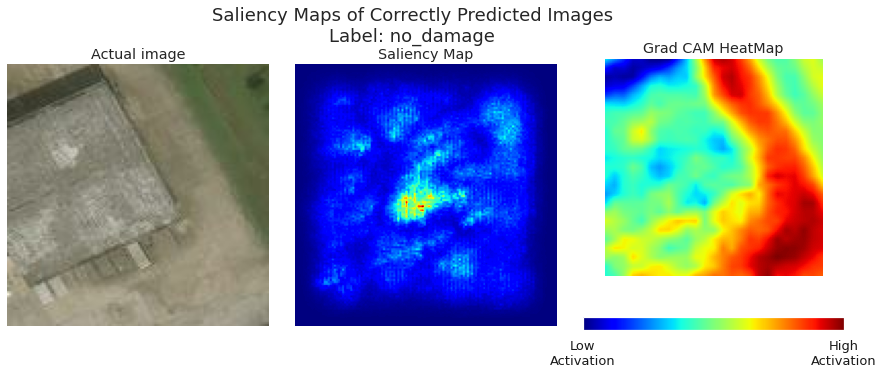

In [ ]:
# PLOTTING THE SALIENCY MAP AND GRADCAM 

fig,axs = plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.1)
axs[0].imshow(image.numpy()/255)
axs[0].axis('off')
axs[0].set_title("Actual image")

axs[1].imshow(smCNN[0],cmap='jet')
axs[1].axis('off')
axs[1].set_title("Saliency Map")

axs[2].imshow(gcamCNN[0],cmap='jet')
axs[2].axis('off')
axs[2].set_title("Grad CAM HeatMap")

fig.suptitle(y=1.025,t='Saliency Maps of Correctly Predicted Images\nLabel: '+str(labelName),fontsize=18)

norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap='jet', norm=norm)


# Plotting the color bar
cbar = plt.colorbar(sm,ax=axs[2],orientation='horizontal',fraction=0.05)
cbar.set_ticks([cbar.vmin,cbar.vmax])
cbar.ax.xaxis.set_tick_params(color='w',labelsize=15)
cbar.ax.set_xticklabels(['Low\nActivation','High\nActivation'],color='k',fontsize=13)


axs[0].patch.set_facecolor('None')
axs[1].patch.set_facecolor('None')
axs[2].patch.set_facecolor('None')

fig.set_alpha = 0.0
fig.patch.set_visible(False)    



plt.show()

## Model Comparison

Plotting the radar charts (using MPLSoccer library) to compare performance of each model

In [ ]:
# creating list of parameters and ranges

params = ['Accuracy(%)\n','AUC-ROC\n','Precision\n','Recall\n','False Positive\nRate(%)\n','False Negative\nRate(%)\n']
low = [0,0,0,0,0,0]
high = [100,1,1,1,100,100]

In [ ]:
# performance metrics on balanced test data

balANNValues = [balancedAccuracyANN*100,balRocAucANN,precision_bal_ANN,recall_bal_ANN,fpr_bal_ANN*100,fnr_bal_ANN*100]
balCNNValues = [balancedAccuracyCNN*100,balRocAucCNN,precision_bal_CNN,recall_bal_CNN,fpr_bal_CNN*100,fnr_bal_CNN*100]
balResNetValues = [balancedAccuracyResNet*100,balRocAucResNet,precision_bal_ResNet,recall_bal_ResNet,fpr_bal_ResNet*100,fnr_bal_ResNet*100]

In [ ]:
# helper function
# to plot radar charts

def drawRadar(params,low,high,values,ax):

  df = pd.DataFrame([params,values]).T
  df.columns = ['params','values']
  df['strValues'] =np.around(df['values'].astype(np.double),3).astype(str)
  df['Combined'] = df['params']+'('+df['strValues']+')'

  lowerBetter = df[df['params'].str.contains('False')]['Combined'].values.tolist()

  radar = mplsoccer.Radar(df['Combined'],low,high,
                          lower_is_better=lowerBetter,
                          round_int=[False]*len(params),
                          num_rings=10,
                          ring_width=1, center_circle_radius=1)
  
  radar.setup_axis(ax=ax)
  rings_inner = radar.draw_circles(ax=ax, facecolor='#c9c9c9', edgecolor='#c9c9c9')  
  radar_output = radar.draw_radar(values,ax=ax,
                                  kwargs_radar={'facecolor': '#4da3ff','alpha':0.65}) 
  range_labels = radar.draw_range_labels(ax=ax, fontsize=10,fontweight='bold')  
  param_labels = radar.draw_param_labels(ax=ax, offset=1.75, fontsize=15,fontweight='bold')  

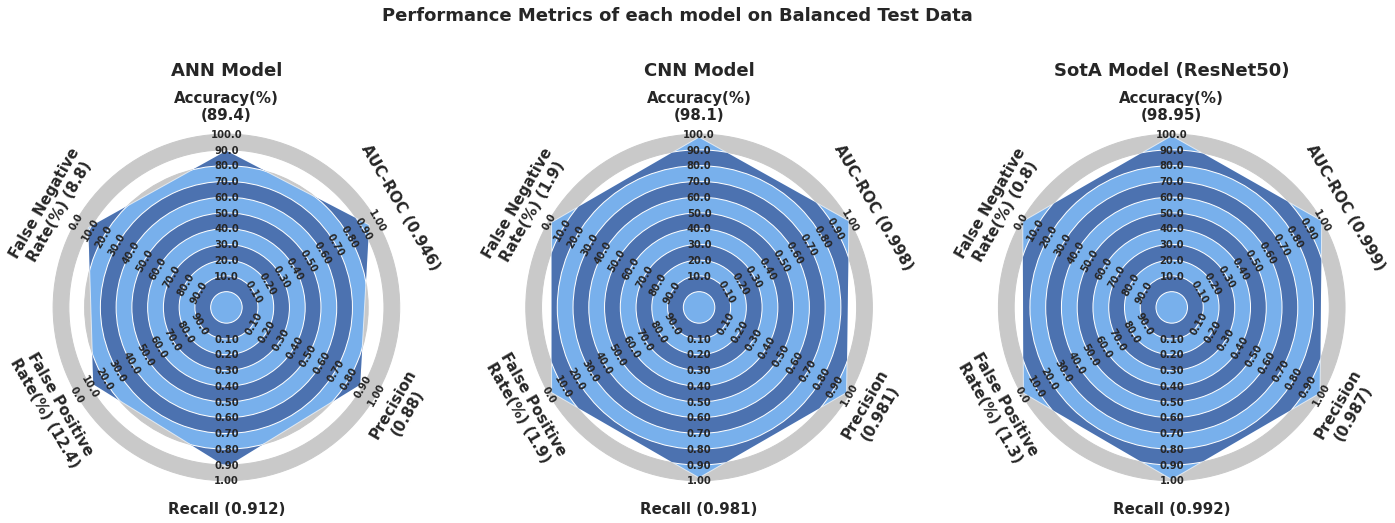

In [ ]:
# plotting the radar charts

fig,axs = plt.subplots(1,3,figsize=(24,8))

drawRadar(params,low,high,balANNValues,ax=axs[0])
axs[0].set_title(y=1.075,label='ANN Model',fontsize=18,fontweight='bold')

drawRadar(params,low,high,balCNNValues,ax=axs[1])
axs[1].set_title(y=1.075,label='CNN Model',fontsize=18,fontweight='bold')

drawRadar(params,low,high,balResNetValues,ax=axs[2])
axs[2].set_title(y=1.075,label='SotA Model (ResNet50)',fontsize=18,fontweight='bold')

fig.suptitle(y=1.025,t='Performance Metrics of each model on Balanced Test Data',fontsize=18,fontweight='bold')

plt.show()

In [ ]:
# performance metrics on imbalanced test dataset

imbalANNValues = [imbalancedAccuracyANN*100,imbalRocAucANN,precision_imb_ANN,recall_imb_ANN,fpr_imb_ANN*100,fnr_imb_ANN*100]
imbalCNNValues = [imbalancedAccuracyCNN*100,imbalRocAucCNN,precision_imb_CNN,recall_imb_CNN,fpr_imb_CNN*100,fnr_imb_CNN*100]
imbalResNetValues = [imbalancedAccuracyResNet*100,imbalRocAucResNet,precision_imb_ResNet,recall_imb_ResNet,fpr_imb_ResNet*100,fnr_imb_ResNet*100]

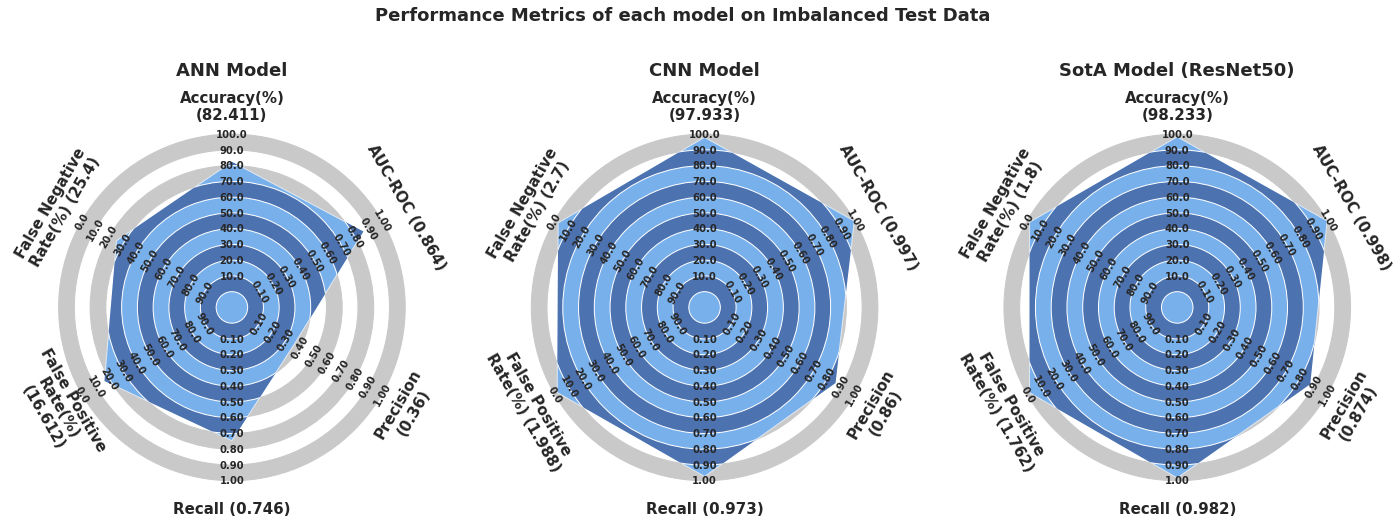

In [ ]:
# plotting the radar charts

fig,axs = plt.subplots(1,3,figsize=(24,8))

drawRadar(params,low,high,imbalANNValues,ax=axs[0])
axs[0].set_title(y=1.075,label='ANN Model',fontsize=18,fontweight='bold')

drawRadar(params,low,high,imbalCNNValues,ax=axs[1])
axs[1].set_title(y=1.075,label='CNN Model',fontsize=18,fontweight='bold')

drawRadar(params,low,high,imbalResNetValues,ax=axs[2])
axs[2].set_title(y=1.075,label='SotA Model (ResNet50)',fontsize=18,fontweight='bold')

fig.suptitle(y=1.025,t='Performance Metrics of each model on Imbalanced Test Data',fontsize=18,fontweight='bold')

axs[0].patch.set_facecolor('None')
axs[1].patch.set_facecolor('None')
axs[2].patch.set_facecolor('None')

fig.set_alpha = 0.0
fig.patch.set_visible(False)    

plt.show()

# Conclusion and Future Work

- Basing on the performance metrics, the ResNet50 outperforms the ANN model by a significant margin and the slightly edges out the CNN model
- There seems to be a minor loss in precision when dealing with the imbalanced dataset.

- In future we can expand the scope of this project by using object detection for detecting the buildingd and perform classification of the building's damage, post any natural disaster. 
- We can also try to predict the extent of the damage of the building as a score, so that the first responders can prioritize those buildings better.

# Thank You